In [6]:
# Data Pre-processing
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(r'./Data.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [10]:
train= df[df['Date']<'2015010']
test = df[df['Date']>'20141231']

In [14]:
data = train.iloc[:,2:27]

In [16]:
data.replace('[^a-zA-Z]',' ',inplace=True)

In [18]:
new_index = [str(i) for i in range(25)]

In [19]:
data.columns = new_index

In [47]:
data.shape

(3975, 25)

In [22]:
for index in new_index:
    data[index] = data[index].str.lower()

In [24]:
data.iloc[1,0:25]

0                                             scorecard
1                                   the best lake scene
2                         leader: german sleaze inquiry
3                                         cheerio, boyo
4                              the main recommendations
5                                has cubie killed fees?
6                                has cubie killed fees?
7                                has cubie killed fees?
8     hopkins 'furious' at foster's lack of hannibal...
9                                has cubie killed fees?
10                                  a tale of two tails
11              i say what i like and i like what i say
12                             elbows, eyes and nipples
13      task force to assess risk of asteroid collision
14                           how i found myself at last
15                                 on the critical list
16                            the timing of their lives
17                                          dear

In [27]:
headlines =[]
for i in data.iloc[1,0:25]:
    headlines.append(i)
' '.join(headlines)

"scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins 'furious' at foster's lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man's extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn't know without the movies millennium bug fails to bite"

In [29]:
' '.join([str(i) for i in data.iloc[1,0:25]])

"scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins 'furious' at foster's lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man's extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn't know without the movies millennium bug fails to bite"

In [37]:
headlines =[]

for row in range (0,len(data)):
    headlines.append(' '.join([str(i) for i in data.iloc[row,0:25]]))

In [50]:
len(headlines)

3975

In [38]:
# Bag of Words and Random Forest Classifier

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [40]:
cv=CountVectorizer(ngram_range=(2,2))
traindata_x=cv.fit_transform(headlines)

In [46]:
traindata_x.shape

(3975, 598207)

In [41]:
randomclassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')

In [42]:
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [43]:
test_transform =[]

for row in range (0,len(test)):
    test_transform.append(' '.join([str(i) for i in test.iloc[row,2:27]]))

In [44]:
test_data = cv.transform(test_transform)

In [53]:
test_data

<1x598207 sparse matrix of type '<class 'numpy.int64'>'
	with 489 stored elements in Compressed Sparse Row format>

In [45]:
predictions =randomclassifier.predict(test_data)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
# Model Evaluation

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
cm = confusion_matrix(test['Label'],predictions)
cm

array([[138,  48],
       [ 11, 181]])

In [56]:
import matplotlib.pyplot as plt

Text(48.52500000000006, 0.5, 'Predicted Labals')

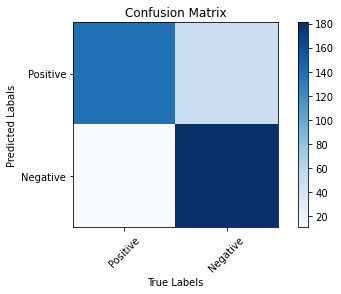

In [63]:
plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
labels=['Positive','Negative']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks,labels,rotation=45)
plt.yticks(tick_marks,labels)

plt.tight_layout()
plt.xlabel('True Labels')
plt.ylabel('Predicted Labals')

In [64]:
from sklearn.metrics import classification_report

In [65]:
accuracy_score(test['Label'],predictions)

0.843915343915344

In [67]:
report = classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       186
           1       0.79      0.94      0.86       192

    accuracy                           0.84       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.84      0.84       378



In [68]:
# Naive Bayes Method

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
nb = MultinomialNB()

In [74]:
nb.fit(traindata_x,train['Label'])

MultinomialNB()

In [75]:
predictions =nb.predict(test_data)

In [78]:
cm2 = confusion_matrix(test['Label'],predictions)
cm2

array([[137,  49],
       [  9, 183]])

In [80]:
def plot_confusion_matrix(cm,title='Confusion Matrix'):
    plt.imshow(cm,cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    labels=['Positive','Negative']
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks,labels,rotation=45)
    plt.yticks(tick_marks,labels)

    plt.tight_layout()
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labals')

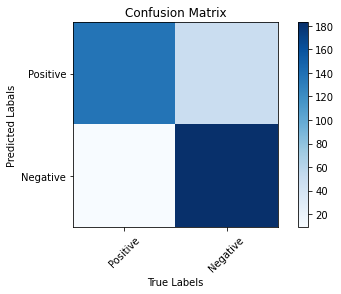

In [81]:
plot_confusion_matrix(cm2)

In [82]:
report = classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



In [84]:
accuracy_score(test['Label'],predictions)

0.8465608465608465